# Planar Classification with One Hidden Layer 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn.datasets
import sklearn.linear_model
import itertools
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

## DataSet

The following code will load a "flower" 2-class dataset into variables X and Y.

In [2]:
X, Y = load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Our goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

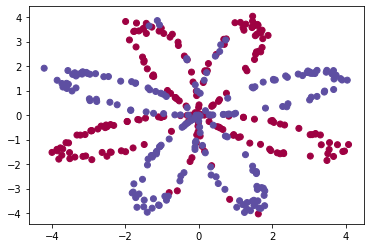

In [3]:
plt.scatter(X[0,:],X[1,:], c=Y, cmap=plt.cm.Spectral)

In [4]:
shape_x = X.shape
shape_y = Y.shape
m = X.shape[1]
print('Shape of X: ',shape_x,'\nShape of Y: ',shape_y,'\nNo. of training examples: ',m)

Shape of X:  (2, 400) 
Shape of Y:  (1, 400) 
No. of training examples:  400


## Neural Network Model

Here is our Model:

<img src="images/classification_kiank.png" style="width:600px;height:300px;">

The general methodology to build a Neural Network is to:

1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

We often build helper functions to compute steps 1-3 and then merge them into one function we call nn_model(). Once we built nn_model() and learnt the right parameters, we can make predictions on new data.

### 1. Define Neural Network Architecture

In [5]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] 
    n_h = 4               #size of hidden layer
    n_y = Y.shape[0]
    
    return n_x, n_h, n_y

In [6]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


### 2. Initialize Model's Parameters

In [7]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {'W1':W1,
                 'b1':b1,
                 'W2':W2,
                 'b2':b2}
    
    return parameters

In [8]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


### 3. The Loop

### Forward Propagation

In [9]:
def forward_prop(X, parameters):
    
    W1 = parameters['W1'] 
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {'Z1':Z1,
            'A1':A1,
            'Z2':Z2,
            'A2':A2}
    
    return A2, cache

In [10]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_prop(X_assess, parameters)

print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


### Compute Cost

We can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} $$

<b>OR</b>

$$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$$

In [11]:
def compute_cost(A2, Y):
    
    m = Y.shape[1]
    
    logprobs = np.multiply(np.log(A2),Y)
    cost = - np.sum(logprobs)
    
    return cost

In [12]:
A2, Y_assess, _ = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6926858869721941


### Backward Propagation

<img src="images/grad_summary.png" style="width:600px;height:300px;">

In [13]:
def backward_prop(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims = True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {'dW1':dW1,
             'db1':db1,
             'dW2':dW2,
             'db2':db2}
    
    return grads

In [14]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_prop(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [15]:
def update_parameters(parameters, grads, learning_rate = 1.2 ):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {'W1':W1,
                 'b1':b1,
                 'W2':W2,
                 'b2':b2}
    
    return parameters

In [16]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


### 4. Merge all Parts into a Model

In [17]:
def model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    
    np.random.seed(3)
    n_x, _ , n_y = layer_sizes(X, Y)
     
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
    
        A2, cache = forward_prop(X, parameters)

        cost = compute_cost(A2, Y)

        grads = backward_prop(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, learning_rate = 1.2)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f"%(i,cost))
            
    return parameters

In [19]:
X_assess, Y_assess = nn_model_test_case()
parameters = model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)

Cost after iteration 0: 1.385354
Cost after iteration 1000: 0.000317
Cost after iteration 2000: 0.000158
Cost after iteration 3000: 0.000105
Cost after iteration 4000: 0.000079
Cost after iteration 5000: 0.000063
Cost after iteration 6000: 0.000053
Cost after iteration 7000: 0.000045
Cost after iteration 8000: 0.000040
Cost after iteration 9000: 0.000035


### 5. Predictions

In [20]:
def predict(parameters, X):
    
    A2, _ = forward_prop(X, parameters)
    
    y_predict = np.round(A2)
    
    return y_predict

In [21]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


So now the model is build, we can now use this model to to see how it performs on planar dataset

In [22]:
parameters = model(X, Y, n_h = 4, num_iterations = 10000, print_cost = True)

Cost after iteration 0: 138.613963
Cost after iteration 1000: 57.643326
Cost after iteration 2000: 50.677062
Cost after iteration 3000: 46.632785
Cost after iteration 4000: 45.276968
Cost after iteration 5000: 44.448380
Cost after iteration 6000: 43.847601
Cost after iteration 7000: 43.384818
Cost after iteration 8000: 39.820883
Cost after iteration 9000: 39.505843


### Plot Decision Boundary

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

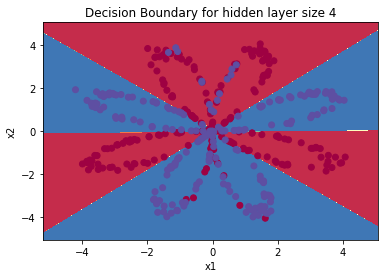

In [23]:
plot_decision_boundary(lambda x: predict(parameters,x.T),X,Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

### Accuracy

In [24]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression.

### Tunning Hidden Layer Size

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title("Hidden Layer size of"+str(n_h))
    parameters = model(X, Y, n_h, num_iterations = 5000, print_cost = False)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)
    print("Accuracy for Layer {} is {}%".format(n_h, accuracy))

Accuracy for Layer 1 is 67.5%
Accuracy for Layer 2 is 67.25%
Accuracy for Layer 3 is 90.75%
Accuracy for Layer 4 is 90.5%
Accuracy for Layer 5 is 91.25%
Accuracy for Layer 20 is 90.0%
